# Linear Regression using Batch Gradient Descent

In [1]:
import random
from matplotlib import pyplot as plt
import numpy as np

Create a function to generate y values from x values. The formula for the function will be: y = (3)x + (2)

In [2]:
def fx(x):
    """Function to generate the y values"""
    formula = 2 + x * 3
    variation = random.uniform(-2, 2)
    return formula + variation

Generate x and y values and plot to visualise

Text(0,0.5,'Y values')

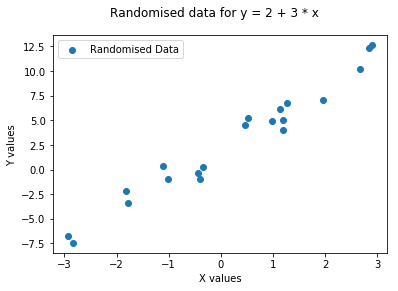

In [3]:
x_vals = [random.uniform(-3, 3) for iteration in range(20)]
y_vals = [fx(num) for num in x_vals]
fig = plt.figure()
plt.scatter(x_vals, y_vals, label='Randomised Data')

plt.legend()
fig.suptitle('Randomised data for y = 2 + 3 * x')
plt.xlabel('X values')
plt.ylabel('Y values')

We will use the model h_theta(x) = theta_0 + theta_1 * x  
Create a function to find the sum of the errors for parameters theta_0 and theta_1

In [4]:
def sum_errors_t0(x, y, t0, t1):
    """Get the sum of errors for updating of theta_0"""
    total_error = 0
    # Iterate through x and y values summing up the errors
    for xi, yi in list(zip(x, y)):
        h_theta = (t0 + t1 * xi)
        error = h_theta - yi
        total_error += error
    return total_error


def sum_errors_t1(x, y, t0, t1):
    """Get the sum of errors for updating of theta_1"""
    total_error = 0
    # Iterate through x and y values summing up the errors
    for xi, yi in list(zip(x, y)):
        h_theta = (t0 + t1 * xi)
        error = h_theta - yi
        total_error += error * xi
    return total_error

Create a function to get partial derivatives for t0 and t1 values according to batch gradient descent

In [5]:
def partial_t0(x, y, t0, t1):
    """Get the partial derivate in terms of t0"""
    # Get m the number of values in the sample
    m = len(x)
    sum_error = sum_errors_t0(x, y, t0, t1)
    return (1/m) * sum_error


def partial_t1(x, y, t0, t1):
    """Get the partial derivative in terms of t1"""
    # Get m the number of values in the sample
    m = len(x)
    sum_error = sum_errors_t1(x, y, t0, t1)
    return (1/m) * sum_error

Create a function to get new t0 and t1 parameters

In [6]:
def update_params(x, y, t0, t1, alpha):
    """Returns new t0 and t1 predictions"""
    temp_t0 = t0 - alpha * partial_t0(x, y, t0, t1)
    temp_t1 = t1 - alpha * partial_t1(x, y, t0, t1)
    return temp_t0, temp_t1

Create a function to do the linear regression

In [7]:
def predict(x, y, t0, t1, alpha, iterations):
    """Predicts the parameters t0 and t1 with alpha learning rate"""
    t0_vals = []
    t1_vals = []
    for _ in range(iterations):
        t0, t1 = update_params(x, y, t0, t1, alpha)
        t0_vals.append(t0)
        t1_vals.append(t1)
    return t0, t1, t0_vals, t1_vals

Use linear regression to predict t0 and t1 values  
Start at (0, 0), use learning rate of 0.1 and 15 iterations and do gradient descent

Text(0,0.5,'Y values')

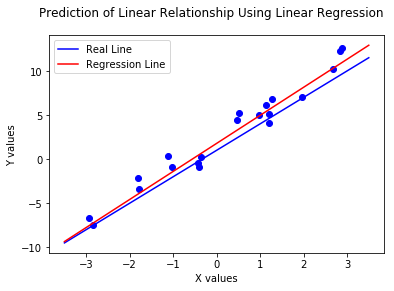

In [8]:
t0_predict, t1_predict, t0_values, t1_values = predict(x_vals, y_vals, 0, 0, 0.1, 15)

fig = plt.figure()
ax = plt.axes()

# Plot the data points
ax.scatter(x_vals, y_vals, color='blue')

# Make enpoints of lines go from -3 to 3
x = np.array([-3.5, 3.5])

# Plot line for the formula random points were generated from
ax.plot(x, 1 + 3 * x, color = 'blue', label='Real Line')


# Plot regression line
ax.plot(x, t0_predict + t1_predict * x, color='red', label='Regression Line')

plt.legend()
fig.suptitle('Prediction of Linear Relationship Using Linear Regression')
plt.xlabel('X values')
plt.ylabel('Y values')

Plot t_values

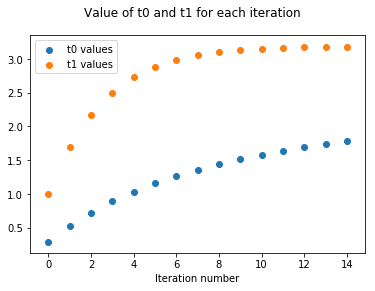

In [9]:
fig = plt.figure()
plt.scatter(range(15), t0_values, label='t0 values')
plt.scatter(range(15), t1_values, label='t1 values')
fig.suptitle('Value of t0 and t1 for each iteration')
plt.xlabel('Iteration number')
plt.legend()